**Import the Module**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Load the Data**

In [45]:
d=pd.read_csv("/content/heart (1).csv")

**EDA**

In [46]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
d.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [48]:
d.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]>

In [49]:
d.shape

(1025, 14)

In [50]:
d.count()

,0
age,1025
sex,1025
cp,1025
trestbps,1025
chol,1025
fbs,1025
restecg,1025
thalach,1025
exang,1025
oldpeak,1025


In [51]:
print(d.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<ipython-input-52-501a1ec6f7b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target",y="age", data=d, palette="coolwarm")


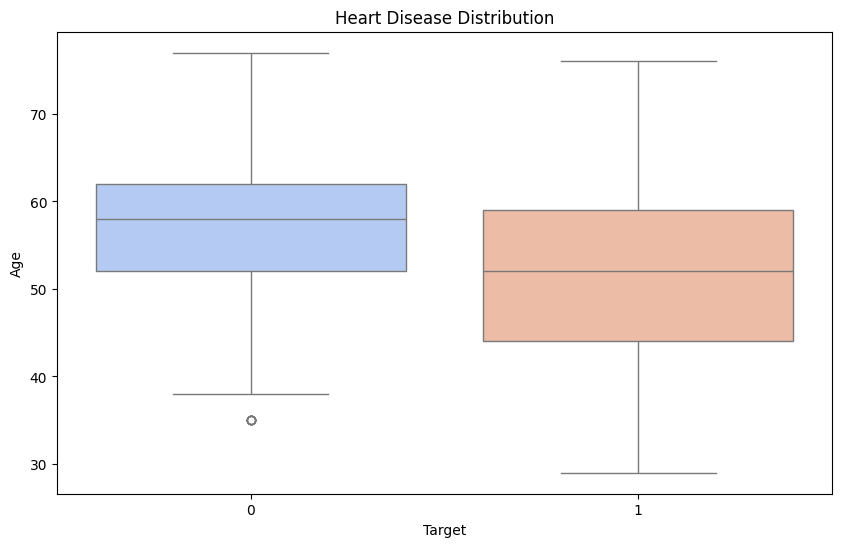

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x="target",y="age", data=d, palette="coolwarm")
plt.title("Heart Disease Distribution")
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()

Text(0, 0.5, 'Thalach Level')

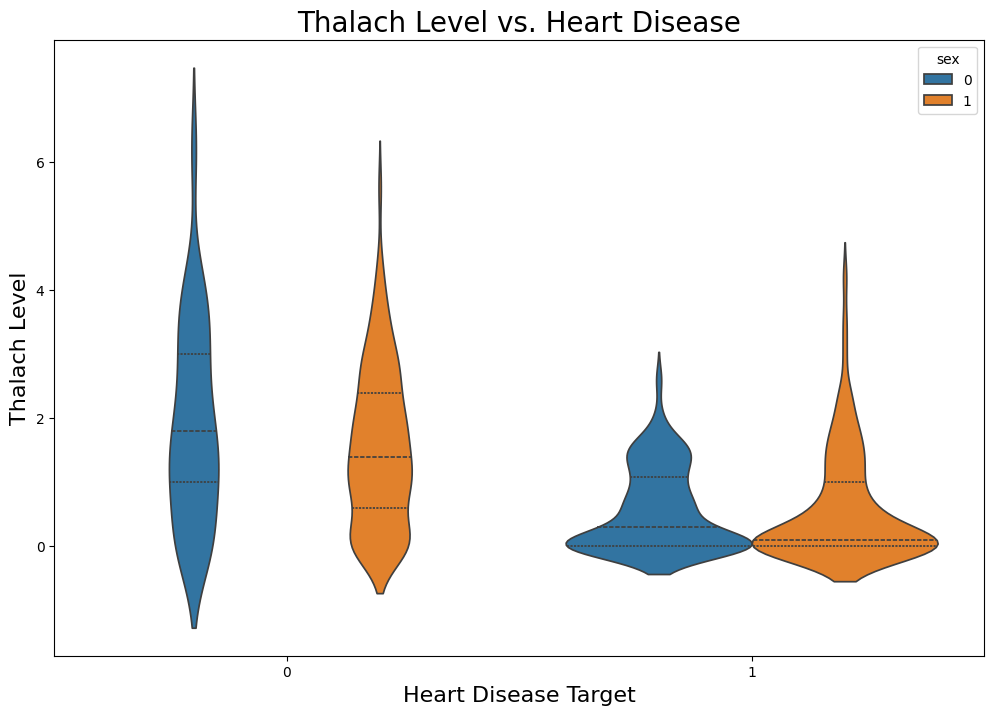

In [53]:
plt.figure(figsize=(12,8))
sns.violinplot(x="target", y= "oldpeak",hue="sex", inner="quartile",data=d)
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'Thalach Level')

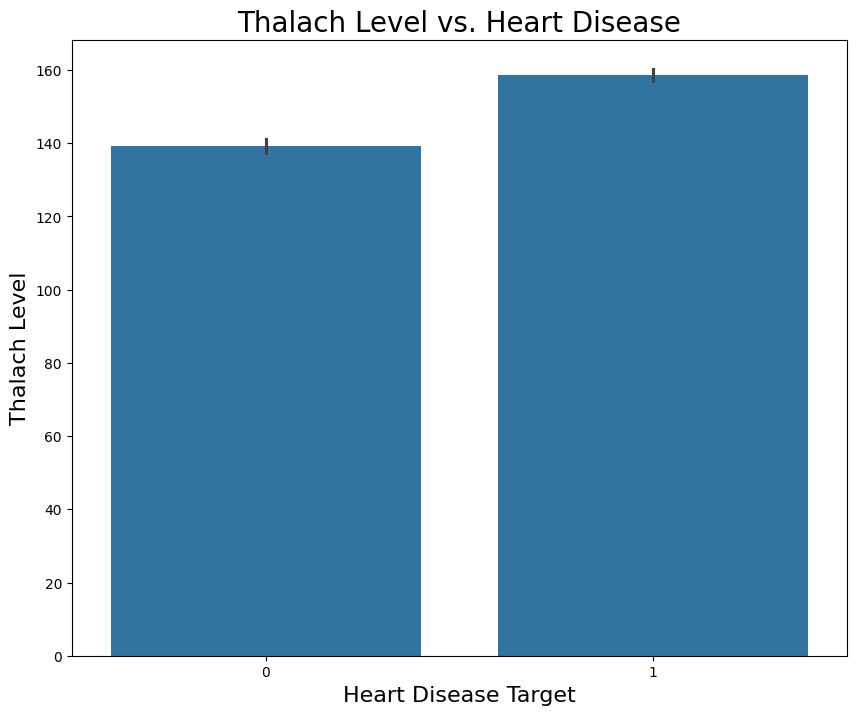

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x="target", y="thalach", data=d)
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

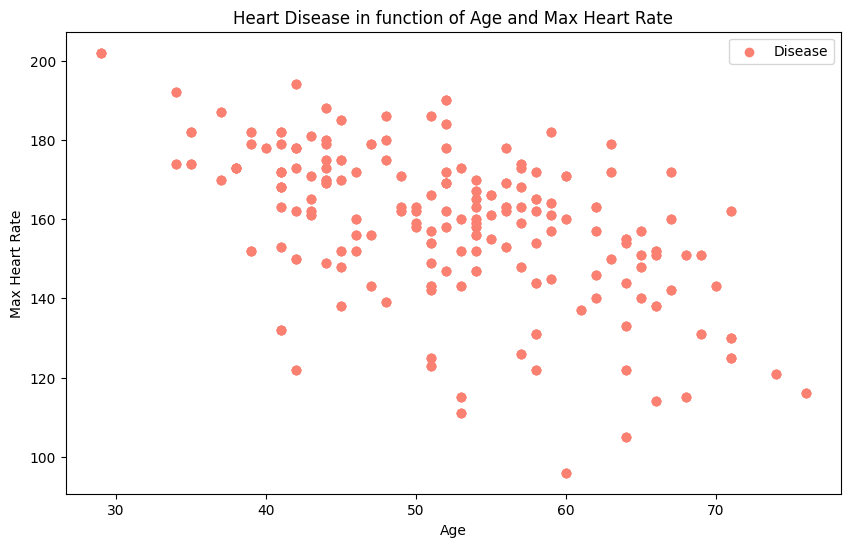

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(d.age[d.target==1],d.thalach[d.target==1],color="salmon")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

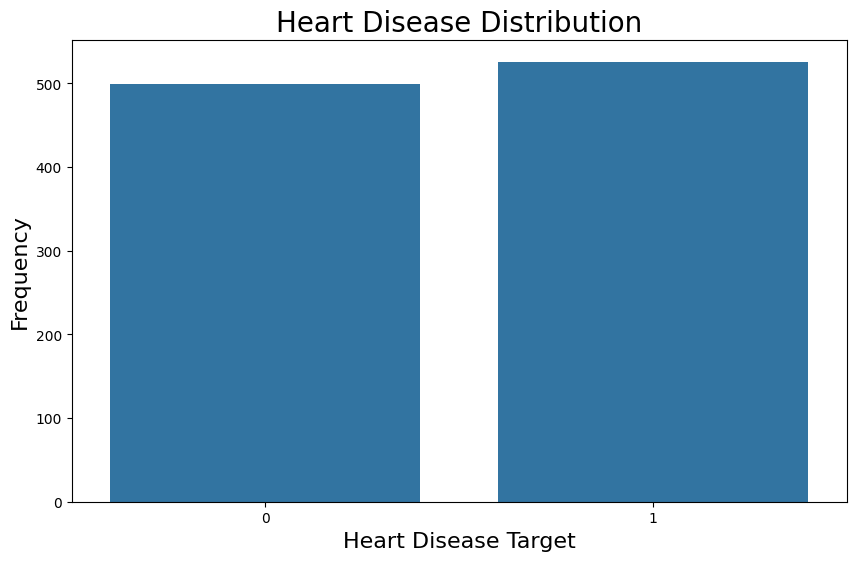

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x="target", data=d)
plt.title("Heart Disease Distribution",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

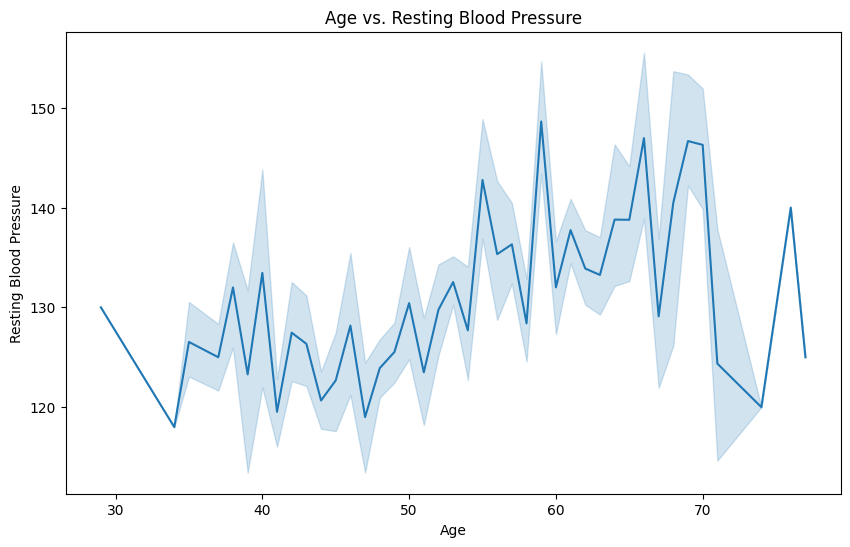

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age", y="trestbps", data=d)
plt.title("Age vs. Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.show()

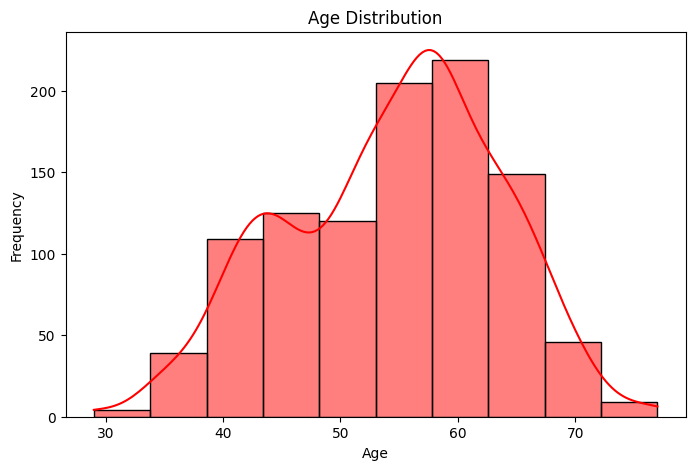

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(d["age"],bins=10,kde=True,color="red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

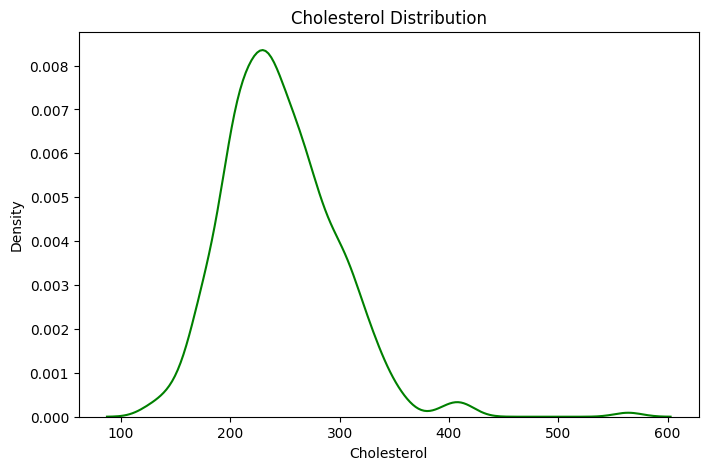

In [59]:
plt.figure(figsize=(8,5))
sns.kdeplot(d["chol"],color="green")
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.show()

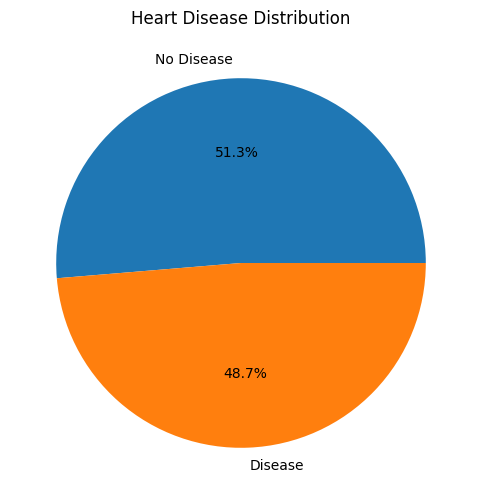

In [60]:
plt.figure(figsize=(9,6))
plt.pie(d["target"].value_counts(), labels=["No Disease","Disease"], autopct='%1.1f%%')
plt.title("Heart Disease Distribution")
plt.show()

**Training and Splitting the Data**

In [61]:
x=d.drop(columns='target',axis=1)
y=d['target']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

**Classification**

In [63]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy of first model: {accuracy * 100:.2f}%")


Accuracy of first model: 84.88%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Prediction**

In [68]:
age = int(input("Enter the Age: "))
sex = int(input("Enter the Sex (1 for Male, 0 for Female): "))
cp = int(input("Enter the Chest Pain Type (0-3): "))
trestbps = int(input("Enter the Resting Blood Pressure: "))
chol = int(input("Enter the Serum Cholesterol: "))
fbs = int(input("Enter the Fasting Blood Sugar (1 for True, 0 for False): "))
restecg = int(input("Enter the Resting Electrocardiographic Results (0-2): "))
thalach = int(input("Enter the Maximum Heart Rate Achieved: "))
exang = int(input("Enter the Exercise Induced Angina (1 for Yes, 0 for No): "))
oldpeak = float(input("Enter the ST Depression Induced by Exercise Relative to Rest: "))
slope = int(input("Enter the Slope of the Peak Exercise ST Segment (0-2): "))
ca = int(input("Enter the Number of Major Vessels Colored by Fluoroscopy (0-3): "))
thal = int(input("Enter the Thal (1-3): "))
new_data = pd.DataFrame({
    "age": [age],
    "sex": [sex],
    "cp": [cp],
    "trestbps": [trestbps],
    "chol": [chol],
    "fbs": [fbs],
    "restecg": [restecg],
    "thalach": [thalach],
    "exang": [exang],
    "oldpeak": [oldpeak],
    "slope": [slope],
    "ca": [ca],
    "thal": [thal]
})
predictions = model.predict(new_data)
print("\nPrediction result:", "Heart Disease" if predictions[0] == 1 else "No Heart Disease")

Enter the Age: 58
Enter the Sex (1 for Male, 0 for Female): 1
Enter the Chest Pain Type (0-3): 1
Enter the Resting Blood Pressure: 122
Enter the Serum Cholesterol: 180
Enter the Fasting Blood Sugar (1 for True, 0 for False): 1
Enter the Resting Electrocardiographic Results (0-2): 2
Enter the Maximum Heart Rate Achieved: 89
Enter the Exercise Induced Angina (1 for Yes, 0 for No): 0
Enter the ST Depression Induced by Exercise Relative to Rest: 145
Enter the Slope of the Peak Exercise ST Segment (0-2): 1
Enter the Number of Major Vessels Colored by Fluoroscopy (0-3): 3
Enter the Thal (1-3): 1

Prediction result: No Heart Disease
